<a href="https://colab.research.google.com/github/cesaroliveiragoes/Challenge-FIAP-NEXT-2023-Minsait-Rural-Cup/blob/main/challenge_fiap_next_2023_sprint_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATASET 1: ENDEREÇOS ATIBAIA

Importar Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd

Carregar os Dados

In [ ]:
#tratamento dos dados da tabela

dados_atibaia = pd.read_csv('3504107_ATIBAIA.csv', sep = ';', decimal = ',', encoding = 'latin1')

In [ ]:
dados_atibaia

,COD_UF,COD_MUNICIPIO,COD_DISTRITO,COD_SUBDISTRITO,SITUACAO,NOM_TIPO_SEGLOGR,NOM_TITULO_SEGLOGR,NOM_SEGLOGR,NUM_ENDERECO,DSC_MODIFICADOR,...,NOM_COMP_ELEM4,VAL_COMP_ELEM4,NOM_COMP_ELEM5,VAL_COMP_ELEM5,LATITUDE,LONGITUDE,ALTITUDE,DSC_LOCALIDADE,COD_ESPECIE,CEP
0,35,4107,5,0,2,AVENIDA,NaN,JERONIMO CAMARGO,NaN,SN,...,NaN,NaN,NaN,NaN,-23.109026638888892,-46.52119,740.0,RESSACA,3,12940060.0
1,35,4107,5,0,2,ESTRADA,NaN,BENTO SOARES,NaN,SN,...,NaN,NaN,NaN,NaN,-23.071881666666666,-46.679563333333334,753.0,BAIRRO CAMPO DOS ALEIXOS,3,12940970.0
2,35,4107,5,0,2,ESTRADA,NaN,BENTO SOARES,2193.0,NaN,...,NaN,NaN,NaN,NaN,-23.081089972222223,-46.65175,726.0,BAIRRO DA USINA,3,12940970.0
3,35,4107,5,0,2,ESTRADA,NaN,BENTO SOARES,NaN,SN,...,NaN,NaN,NaN,NaN,-23.085945,-46.66995997222222,758.0,BAIRRO CAMPO DOS ALEIXOS,3,12940970.0
4,35,4107,5,0,2,ESTRADA,NaN,BENTO SOARES,NaN,SN,...,NaN,NaN,NaN,NaN,-23.086161666666666,-46.66964330555555,757.0,BAIRRO CAMPO DOS ALEIXOS,3,12940970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,35,4107,5,0,2,AVENIDA,NaN,COPACABANA,NaN,SN,...,NaN,NaN,NaN,NaN,-23.16467997222222,-46.61871163888889,796.0,MARACANA,3,12940060.0
597,35,4107,5,0,2,AVENIDA,NaN,COPACABANA,NaN,SN,...,NaN,NaN,NaN,NaN,-23.16493,-46.62441166666667,NaN,MARACANA,3,12940060.0
598,35,4107,5,0,2,RUA,VEREADOR,CINTRA SOBRINHO,NaN,SN,...,NaN,NaN,NaN,NaN,-23.17205163888889,-46.61913,795.0,MARACANA,3,12940060.0
599,35,4107,5,0,2,RUA,VEREADOR,CINTRA SOBRINHO,NaN,SN,...,NaN,NaN,NaN,NaN,-23.16443163888889,-46.62228997222222,767.0,MARACANA,3,12940060.0


Tratar os dados para análises

In [ ]:
# eliminar as colunas vazias

dados_atibaia = dados_atibaia.dropna(axis=1, how='all')

In [ ]:
dados_atibaia

,COD_UF,COD_MUNICIPIO,COD_DISTRITO,COD_SUBDISTRITO,SITUACAO,NOM_TIPO_SEGLOGR,NOM_TITULO_SEGLOGR,NOM_SEGLOGR,NUM_ENDERECO,DSC_MODIFICADOR,NOM_COMP_ELEM1,VAL_COMP_ELEM1,LATITUDE,LONGITUDE,ALTITUDE,DSC_LOCALIDADE,COD_ESPECIE,CEP
0,35,4107,5,0,2,AVENIDA,NaN,JERONIMO CAMARGO,NaN,SN,NaN,NaN,-23.109026638888892,-46.52119,740.0,RESSACA,3,12940060.0
1,35,4107,5,0,2,ESTRADA,NaN,BENTO SOARES,NaN,SN,NaN,NaN,-23.071881666666666,-46.679563333333334,753.0,BAIRRO CAMPO DOS ALEIXOS,3,12940970.0
2,35,4107,5,0,2,ESTRADA,NaN,BENTO SOARES,2193.0,NaN,NaN,NaN,-23.081089972222223,-46.65175,726.0,BAIRRO DA USINA,3,12940970.0
3,35,4107,5,0,2,ESTRADA,NaN,BENTO SOARES,NaN,SN,NaN,NaN,-23.085945,-46.66995997222222,758.0,BAIRRO CAMPO DOS ALEIXOS,3,12940970.0
4,35,4107,5,0,2,ESTRADA,NaN,BENTO SOARES,NaN,SN,NaN,NaN,-23.086161666666666,-46.66964330555555,757.0,BAIRRO CAMPO DOS ALEIXOS,3,12940970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,35,4107,5,0,2,AVENIDA,NaN,COPACABANA,NaN,SN,NaN,NaN,-23.16467997222222,-46.61871163888889,796.0,MARACANA,3,12940060.0
597,35,4107,5,0,2,AVENIDA,NaN,COPACABANA,NaN,SN,NaN,NaN,-23.16493,-46.62441166666667,NaN,MARACANA,3,12940060.0
598,35,4107,5,0,2,RUA,VEREADOR,CINTRA SOBRINHO,NaN,SN,NaN,NaN,-23.17205163888889,-46.61913,795.0,MARACANA,3,12940060.0
599,35,4107,5,0,2,RUA,VEREADOR,CINTRA SOBRINHO,NaN,SN,NaN,NaN,-23.16443163888889,-46.62228997222222,767.0,MARACANA,3,12940060.0


In [ ]:
# Alterar o nome das colunas para facilitar a análise

dados_atibaia = dados_atibaia.rename(columns = {'NOM_TIPO_SEGLOGR':'NOME_TIPO', 'NOM_TITULO_SEGLOGR':'NOME_TITULO', 'NOM_SEGLOGR': 'NOME_LOGRADOURO', 'NOM_COMP_ELEM1':'NOME_COMPLEMENTO','DSC_LOCALIDADE' : 'NOME_BAIRRO'})

In [ ]:
dados_atibaia

,COD_UF,COD_MUNICIPIO,COD_DISTRITO,COD_SUBDISTRITO,SITUACAO,NOME_TIPO,NOME_TITULO,NOME_LOGRADOURO,NUM_ENDERECO,DSC_MODIFICADOR,NOME_COMPLEMENTO,VAL_COMP_ELEM1,LATITUDE,LONGITUDE,ALTITUDE,NOME_BAIRRO,COD_ESPECIE,CEP
0,35,4107,5,0,2,AVENIDA,NaN,JERONIMO CAMARGO,NaN,SN,NaN,NaN,-23.109026638888892,-46.52119,740.0,RESSACA,3,12940060.0
1,35,4107,5,0,2,ESTRADA,NaN,BENTO SOARES,NaN,SN,NaN,NaN,-23.071881666666666,-46.679563333333334,753.0,BAIRRO CAMPO DOS ALEIXOS,3,12940970.0
2,35,4107,5,0,2,ESTRADA,NaN,BENTO SOARES,2193.0,NaN,NaN,NaN,-23.081089972222223,-46.65175,726.0,BAIRRO DA USINA,3,12940970.0
3,35,4107,5,0,2,ESTRADA,NaN,BENTO SOARES,NaN,SN,NaN,NaN,-23.085945,-46.66995997222222,758.0,BAIRRO CAMPO DOS ALEIXOS,3,12940970.0
4,35,4107,5,0,2,ESTRADA,NaN,BENTO SOARES,NaN,SN,NaN,NaN,-23.086161666666666,-46.66964330555555,757.0,BAIRRO CAMPO DOS ALEIXOS,3,12940970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,35,4107,5,0,2,AVENIDA,NaN,COPACABANA,NaN,SN,NaN,NaN,-23.16467997222222,-46.61871163888889,796.0,MARACANA,3,12940060.0
597,35,4107,5,0,2,AVENIDA,NaN,COPACABANA,NaN,SN,NaN,NaN,-23.16493,-46.62441166666667,NaN,MARACANA,3,12940060.0
598,35,4107,5,0,2,RUA,VEREADOR,CINTRA SOBRINHO,NaN,SN,NaN,NaN,-23.17205163888889,-46.61913,795.0,MARACANA,3,12940060.0
599,35,4107,5,0,2,RUA,VEREADOR,CINTRA SOBRINHO,NaN,SN,NaN,NaN,-23.16443163888889,-46.62228997222222,767.0,MARACANA,3,12940060.0


In [ ]:
# selecionar as colunas com as informações relevantes para nossas análises

dados_atibaia_final = dados_atibaia[['COD_UF', 'COD_MUNICIPIO', 'NOME_TIPO', 'NOME_LOGRADOURO','NUM_ENDERECO', 'NOME_COMPLEMENTO', 'LATITUDE', 'LONGITUDE', 'ALTITUDE', 'NOME_BAIRRO', 'CEP']]

In [ ]:
dados_atibaia_final

,COD_UF,COD_MUNICIPIO,NOME_TIPO,NOME_LOGRADOURO,NUM_ENDERECO,NOME_COMPLEMENTO,LATITUDE,LONGITUDE,ALTITUDE,NOME_BAIRRO,CEP
0,35,4107,AVENIDA,JERONIMO CAMARGO,NaN,NaN,-23.109026638888892,-46.52119,740.0,RESSACA,12940060.0
1,35,4107,ESTRADA,BENTO SOARES,NaN,NaN,-23.071881666666666,-46.679563333333334,753.0,BAIRRO CAMPO DOS ALEIXOS,12940970.0
2,35,4107,ESTRADA,BENTO SOARES,2193.0,NaN,-23.081089972222223,-46.65175,726.0,BAIRRO DA USINA,12940970.0
3,35,4107,ESTRADA,BENTO SOARES,NaN,NaN,-23.085945,-46.66995997222222,758.0,BAIRRO CAMPO DOS ALEIXOS,12940970.0
4,35,4107,ESTRADA,BENTO SOARES,NaN,NaN,-23.086161666666666,-46.66964330555555,757.0,BAIRRO CAMPO DOS ALEIXOS,12940970.0
...,...,...,...,...,...,...,...,...,...,...,...
596,35,4107,AVENIDA,COPACABANA,NaN,NaN,-23.16467997222222,-46.61871163888889,796.0,MARACANA,12940060.0
597,35,4107,AVENIDA,COPACABANA,NaN,NaN,-23.16493,-46.62441166666667,NaN,MARACANA,12940060.0
598,35,4107,RUA,CINTRA SOBRINHO,NaN,NaN,-23.17205163888889,-46.61913,795.0,MARACANA,12940060.0
599,35,4107,RUA,CINTRA SOBRINHO,NaN,NaN,-23.16443163888889,-46.62228997222222,767.0,MARACANA,12940060.0


In [ ]:
# uma das análises válidas é descobrir a MODA do CEP e NOME_BAIRRO, NOME_LOGRADOURO e NOME_TIPO, desta forma, descobriremos quais os Bairros, CEP, Logradouro e Tipo que mais se repetem
# para os produtores registrados


moda_cep = dados_atibaia_final['CEP'].mode()[0]
moda_bairro = dados_atibaia_final['NOME_BAIRRO'].mode()[0]
moda_logradouro = dados_atibaia_final['NOME_LOGRADOURO'].mode()[0]
moda_tipo = dados_atibaia_final['NOME_TIPO'].mode()[0]

In [ ]:
moda_cep

12940060.0

In [ ]:
moda_bairro

'BAIRRO DO TANQUE'

In [ ]:
moda_logradouro

'NOVA UNIAO'

In [ ]:
moda_tipo

'ESTRADA'

In [ ]:
# Outra análise útil é encontrar mínimo, máximo e média da altitude das propriedades dos produtores cadastrados, pois, são informações úteis para determinar o que será cultivado em determinado local
# uma vez que determinados tipos de produtos não crescem em qualquer altitude

dados_atibaia_final_altitude = dados_atibaia_final.loc[dados_atibaia_final['ALTITUDE'] != 'NaN']

In [ ]:
dados_atibaia_final_altitude

,COD_UF,COD_MUNICIPIO,NOME_TIPO,NOME_LOGRADOURO,NUM_ENDERECO,NOME_COMPLEMENTO,LATITUDE,LONGITUDE,ALTITUDE,NOME_BAIRRO,CEP
0,35,4107,AVENIDA,JERONIMO CAMARGO,NaN,NaN,-23.109026638888892,-46.52119,740.0,RESSACA,12940060.0
1,35,4107,ESTRADA,BENTO SOARES,NaN,NaN,-23.071881666666666,-46.679563333333334,753.0,BAIRRO CAMPO DOS ALEIXOS,12940970.0
2,35,4107,ESTRADA,BENTO SOARES,2193.0,NaN,-23.081089972222223,-46.65175,726.0,BAIRRO DA USINA,12940970.0
3,35,4107,ESTRADA,BENTO SOARES,NaN,NaN,-23.085945,-46.66995997222222,758.0,BAIRRO CAMPO DOS ALEIXOS,12940970.0
4,35,4107,ESTRADA,BENTO SOARES,NaN,NaN,-23.086161666666666,-46.66964330555555,757.0,BAIRRO CAMPO DOS ALEIXOS,12940970.0
...,...,...,...,...,...,...,...,...,...,...,...
596,35,4107,AVENIDA,COPACABANA,NaN,NaN,-23.16467997222222,-46.61871163888889,796.0,MARACANA,12940060.0
597,35,4107,AVENIDA,COPACABANA,NaN,NaN,-23.16493,-46.62441166666667,NaN,MARACANA,12940060.0
598,35,4107,RUA,CINTRA SOBRINHO,NaN,NaN,-23.17205163888889,-46.61913,795.0,MARACANA,12940060.0
599,35,4107,RUA,CINTRA SOBRINHO,NaN,NaN,-23.16443163888889,-46.62228997222222,767.0,MARACANA,12940060.0


In [ ]:
dados_atibaia_final_altitude['ALTITUDE'] = dados_atibaia_final_altitude['ALTITUDE'].astype(float)

In [ ]:
dados_atibaia_final_altitude.groupby('COD_MUNICIPIO') \
              .agg(altitude_max = pd.NamedAgg('ALTITUDE','max'),
                   altitude_min = pd.NamedAgg('ALTITUDE','min'),
                   altitude_media = pd.NamedAgg('ALTITUDE','mean')) \
              .reset_index()

,COD_MUNICIPIO,altitude_max,altitude_min,altitude_media
0,4107,984.0,708.0,785.035473


In [ ]:
# RESUMO DATAFRAME 1
# Em resumo este dataframe é uma tabela de endereços, onde, podemos tirar insights referentes a localização dos produtores e suas propriedades para assim, as agências de crédito rural poderem
# conhecer melhor a estrutura dos solicitantes do crédito.

#DATAFRAMES 2 - PRONAMP E PRONAF

In [ ]:
# PRONAF é o Programa Nacional de Fortalecimento da Agricultura Familiar com ojetivo de fortalecer os pequenos produtores rurais do Brasil
# PRONAMP é p Programa Nacional de Apoio ao Médio Produtor Rural

In [ ]:
#Leitura e tratamento das tabelas, separadas por programa para cobrir cada um mais minuciosamente

dados_bcb_pronaf = pd.read_csv('PRONAF.csv', sep = ';', decimal = ',', thousands='.', encoding = 'utf-8-sig')
dados_bcb_pronamp = pd.read_csv('Pronamp.csv', sep = ';', decimal = ',', thousands='.', encoding = 'utf-8-sig')

In [ ]:
dados_bcb_pronamp

,uf,adesao_area Amparada_ha,adesao_qtdContratos,adesao_vlrAmparado,adesao_vlrAdicional,comm_perda_areaAmparada_ha,comm_perda_qtdContratos,comm_perda_vlrAmparado,cobert_def_areaAmparada_ha,cobert_def_qtdContratos,cobert_def_vlrAmparado,cobert_def_vlrDeferido,cobert_anal_areaAmparada_ha,cobert_anal_qtdContratos,cobert_anal_vlrAmparado
0,RS,1500308.9,38429,5.089302e+09,3.084699e+08,591479.2,16001,2.304279e+09,558494.0,15124,2.180849e+09,1.509127e+09,1154.8,36,5.315168e+06
1,PR,1205520.0,31741,4.033450e+09,2.775842e+08,496985.9,12193,1.566591e+09,389503.3,9692,1.233586e+09,7.669351e+08,28737.5,755,1.344468e+08
2,SC,109407.0,5844,6.133910e+08,3.739489e+07,29850.7,1694,1.879823e+08,24263.0,1421,1.605292e+08,8.508840e+07,211.9,13,2.012435e+06
3,MS,102501.4,1918,3.287468e+08,1.855344e+07,28146.3,473,8.486326e+07,23243.2,387,6.980816e+07,4.550500e+07,1496.6,30,6.194775e+06
4,MT,16047.8,244,4.459899e+07,2.549545e+06,820.9,12,2.946369e+06,676.9,10,2.667369e+06,1.888636e+06,0.0,0,0.000000e+00
5,GO,9359.3,220,3.676913e+07,2.117914e+06,538.9,11,1.712436e+06,299.9,8,1.098217e+06,5.067289e+05,0.0,0,0.000000e+00
6,DF,127.0,7,6.676238e+05,3.298301e+04,0.0,0,0.000000e+00,0.0,0,0.000000e+00,0.000000e+00,0.0,0,0.000000e+00
7,MG,20187.7,1273,1.605582e+08,7.476534e+06,865.9,45,7.370461e+06,206.8,12,1.881783e+06,8.020926e+05,59.8,4,1.166061e+06
8,SP,20388.3,987,1.252537e+08,5.790837e+06,2009.9,60,8.951190e+06,1069.2,36,5.043660e+06,2.213371e+06,11.5,1,2.629988e+05
9,ES,4245.5,568,6.473667e+07,2.261974e+06,161.8,17,2.831758e+06,66.1,7,1.103843e+06,3.514329e+05,12.0,1,2.000000e+05


In [ ]:
dados_bcb_pronamp.rename(columns={'uf': 'UF', 'adesao_area Amparada_ha': 'adesao_areaAmparada_ha'}, inplace=True)

In [ ]:
#Lista separada por regiões
centro_oeste = ["DF", "GO", "MT", "MS"]
nordeste = ["AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE"]
norte = ["AC", "AP", "AM", "PA", "RO", "RR", "TO"]
sudeste = ["SP","MG","RJ","ES"]
sul = ["RS", "SC", "PR"]
nacional = ["DF", "GO", "MT", "MS","AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE","AC", "AP", "AM", "PA", "RO", "RR", "TO", "SP","MG","RJ","ES", "RS", "SC", "PR"]

dados_centro_oeste_pronamp = dados_bcb_pronamp[dados_bcb_pronamp['UF'].isin(centro_oeste)]
dados_nordeste_pronamp = dados_bcb_pronamp[dados_bcb_pronamp['UF'].isin(nordeste)]
dados_norte_pronamp = dados_bcb_pronamp[dados_bcb_pronamp['UF'].isin(norte)]
dados_sudeste_pronamp = dados_bcb_pronamp[dados_bcb_pronamp['UF'].isin(sudeste)]
dados_sul_pronamp = dados_bcb_pronamp[dados_bcb_pronamp['UF'].isin(sul)]
dados_nacional_pronamp = dados_bcb_pronamp[dados_bcb_pronamp['UF'].isin(nacional)]

In [ ]:
dados_bcb_pronaf

,UF,Adesão_Área Amparada (ha),Adesão_Qtd. Contratos,Adesão_Vlr. Amparado,Adesão_Vlr. Adicional,comm_perdas_Área Amparada (ha),comm_perdas_Qtd. Contratos,comm_perdas_Vlr. Amparado,cobert_def_Área Amparada (ha),cobert_def_Qtd. Contratos,cobert_def_Vlr. Amparado,cobert_def_Vlr. Deferido,cobert_anal_Área Amparada (ha),cobert_anal_Qtd. Contratos,cobert_anal_Vlr. Amparado
0,RS,4793804.4,388094,2.199707e+10,1.143757e+09,2244847.6,179150,1.169229e+10,2178374.1,173595,1.136837e+10,8.464698e+09,5033.6,622,3.488807e+07
1,PR,2767353.2,196541,1.256893e+10,7.239661e+08,1228149.6,78825,5.225561e+09,1108648.4,71830,4.771584e+09,3.395857e+09,29177.3,1660,1.444352e+08
2,SC,625706.1,90991,5.509491e+09,2.381566e+08,180473.6,30346,1.995320e+09,164125.4,28102,1.840595e+09,1.130955e+09,1064.5,176,1.294999e+07
3,MG,174300.9,50383,3.152658e+09,1.066265e+08,5391.8,1005,9.158965e+07,3656.6,674,6.276252e+07,3.516967e+07,359.0,101,8.776899e+06
4,ES,81649.6,22830,1.614514e+09,4.703692e+07,2457.4,528,5.920933e+07,1747.6,393,4.542161e+07,2.461332e+07,86.0,26,2.495057e+06
5,SP,70383.0,10255,7.046205e+08,2.459924e+07,4559.1,436,3.080052e+07,3282.2,309,2.105556e+07,1.055034e+07,119.9,12,1.135044e+06
6,RJ,7065.1,3843,2.092608e+08,5.613187e+06,189.2,147,9.734937e+06,138.6,106,6.993736e+06,3.671847e+06,24.8,20,1.492645e+06
7,BA,147268.6,12532,7.666053e+08,2.725729e+07,42365.5,2277,1.720876e+08,40782.2,2210,1.650343e+08,1.258888e+08,670.0,24,3.106770e+06
8,SE,126938.2,7677,5.180229e+08,1.938456e+07,30504.6,1768,1.397490e+08,28985.3,1697,1.325096e+08,9.624988e+07,783.4,31,4.098071e+06
9,AL,17060.2,2386,1.037208e+08,3.386251e+06,1665.7,68,8.349226e+06,1498.1,57,7.509157e+06,5.967067e+06,35.4,3,2.368814e+05


In [ ]:
dados_centro_oeste_pronaf = dados_bcb_pronaf[dados_bcb_pronaf['UF'].isin(centro_oeste)]
dados_nordeste_pronaf = dados_bcb_pronaf[dados_bcb_pronaf['UF'].isin(nordeste)]
dados_norte_pronaf = dados_bcb_pronaf[dados_bcb_pronaf['UF'].isin(norte)]
dados_sudeste_pronaf = dados_bcb_pronaf[dados_bcb_pronaf['UF'].isin(sudeste)]
dados_sul_pronaf = dados_bcb_pronaf[dados_bcb_pronaf['UF'].isin(sul)]
dados_nacional = dados_bcb_pronaf[dados_bcb_pronaf['UF'].isin(nacional)]

- Funções Aplicáveis

- Amostra regional

In [ ]:
#Esse valor representa a quantidade de contratos ofertados pelo PRONAMP na região sul do país
soma_contratos_sul = dados_sul_pronamp['adesao_qtdContratos'].sum().round()
soma_contratos_sul

76014

In [ ]:
#Esse valor representa a média de de contratos ofertados pelo PRONAMP na região sul do país
media_contratos_sul = dados_sul_pronamp['adesao_qtdContratos'].mean().round()
media_contratos_sul

25338.0

In [ ]:
#Esse valor representa a mediana do valor amparado pelo PRONAMP na região sul do país
mediana_vlrAmparado_sul = dados_sul_pronamp['adesao_vlrAmparado'].median().round()
mediana_vlrAmparado_sul

4033449557.0

In [ ]:
# Vale destacar que calculamos somente a amostra regional do sul uma vez que para calcular das demais regiões basta trocar as variáveis, o método continua o mesmo

- Amostra Nacional

In [ ]:
#Esse valor representa a quantidade de contratos fornecidos no país inteiro pelo PRONAMP
soma_qtdContratos_nacional = dados_nacional_pronamp['adesao_qtdContratos'].sum().round()
soma_qtdContratos_nacional

82492

In [ ]:
#Esse valor representa a soma da área amparada pelo PRONAMP no país inteiro
soma_areaAmparada_nacional = dados_nacional_pronamp['adesao_areaAmparada_ha'].sum().round()
soma_areaAmparada_nacional

3034806.0

In [ ]:
#Esse valor representa a média de contratos por estado
media_contratos_nacional = dados_nacional_pronamp['adesao_qtdContratos'].mean().round()
media_contratos_nacional

3437.0

In [ ]:
#Esse valor representa a média de área amparada por estado pelo PRONAMP no país inteiro
media_areaAmparada_nacional = dados_nacional_pronamp['adesao_areaAmparada_ha'].mean().round()
media_areaAmparada_nacional

126450.0

In [ ]:
#Esse valor representa a soma do valor amparado por estado pelo PRONAMP no país inteiro
soma_vlrAmparado_nacional = dados_nacional_pronamp['adesao_vlrAmparado'].sum().round()
soma_vlrAmparado_nacional

10700959331.0

In [ ]:
#Esse valor representa a média do valor amparado por estado pelo PRONAMP tendo em vista a quantidade ofertada no país inteiro
media_vlrAmparado_nacional = dados_nacional_pronamp['adesao_vlrAmparado'].mean().round()
media_vlrAmparado_nacional

445873305.0

In [ ]:
# GEOPANDAS

brasil = gpd.read_file('BR_UF_2022.shp')

# Mesclando o DataFrame com o shapefile usando a coluna 'estado'
mapa = brasil.merge(dados_bcb_pronaf, how='left', left_on='UF', right_on='Adesão_Área Amparada (ha)')

# Plotando o mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
mapa.plot(column='valor', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Mapa com Dados por Estado')
ax.set_axis_off()
plt.show()






ERROR:fiona._env:Unable to open BR_UF_2022.shx or BR_UF_2022.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.


DriverError: ignored

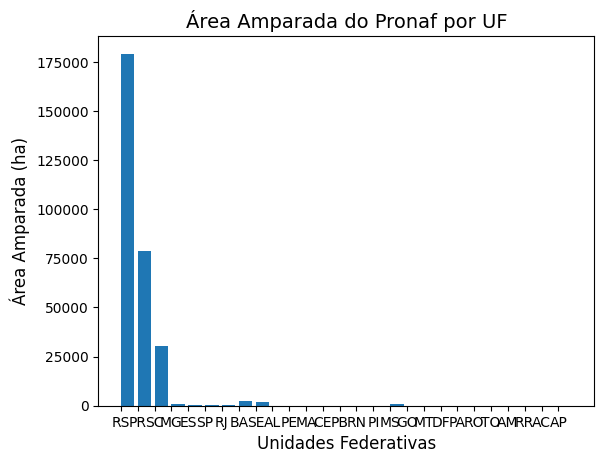

<Figure size 2000x1000 with 0 Axes>

In [ ]:
# Gráficos para comparação entre os valores distribuidos por Unidades Federativas

# Utilizamos a tabela do PRONAF porém a mesma metodologia pode ser aplicada para o PRONAMP

plt.bar(dados_bcb_pronaf['UF'], dados_bcb_pronaf['comm_perdas_Qtd. Contratos'], align='edge')
plt.xlabel('Unidades Federativas', fontsize=12)
plt.ylabel('Área Amparada (ha)', fontsize=12)
plt.title('Área Amparada do Pronaf por UF', fontsize=14)
plt.figure(figsize=(20, 10))
plt.tight_layout()

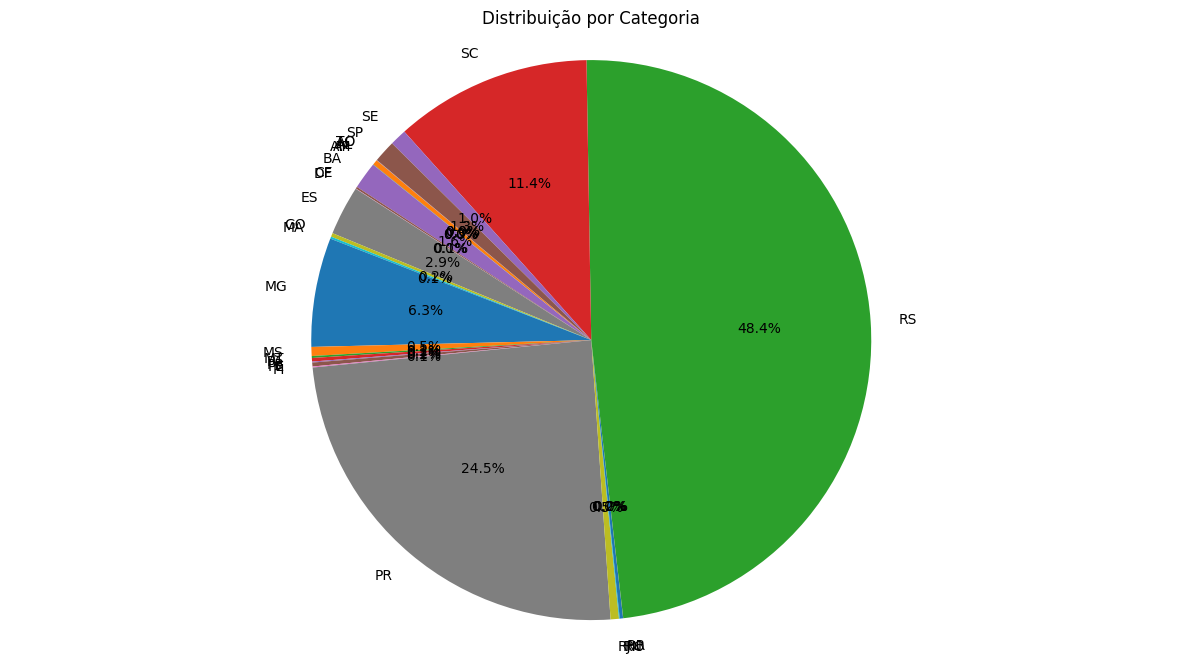

In [ ]:
# Criação do gráfico de pizza usando Matplotlib

# Utilizamos a tabela do PRONAF porém a mesma metodologia pode ser aplicada para o PRONAMP

grouped = dados_bcb_pronaf.groupby('UF')['Adesão_Qtd. Contratos'].sum()
plt.figure(figsize=(15, 8))
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribuição por Categoria')
plt.show()

In [ ]:
# RESUMO DATAFRAME 2

# Em resumo, separamos um dataset em dois dataframes para facilitar a manipulação do mesmo, estes dataframes mostram respectivamente os dois principais programas de crédito rural do governo PRONAF e PRONAMP
# Desta forma, por meio destes dados, pode-se entender a necessidade de crédito rural por unidade federativa e analisar quais estados possuem mais ou menos carência de crédito ou até mesmo
# compreender o nível e importância dos pequenos produtores rurais dentro de um contexto nacional

In [ ]:
# INTEGRANTES GRUPO

# Cesar Oliveira Goes - RM: 98119
# Fiama dos Santos Trajano - RM: 97885
# Gabriel Silva de Negreiros Leal da Rocha - RM: 550759
# Karina Maciel Palmeira - RM: 55177